# U.S. Medical Insurance Costs

import all necessary libaries. 

In [31]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

investigate the data

In [30]:
insurance = pd.read_csv('insurance.csv')
print(type(insurance), '\n')
print(insurance.head(10))

<class 'pandas.core.frame.DataFrame'> 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


Inspect summary of dataset

In [74]:
print(insurance.describe(), '\n')

smoker_count = 0
non_smoker_count = 0
for i in insurance['smoker']:
    if i == 'yes':
        smoker_count = smoker_count + 1
    else:
        non_smoker_count = non_smoker_count + 1
print('smoker count: ' + str(smoker_count) + '\n')
print('non smoker count: ' + str(non_smoker_count) + '\n')
        

print('max charges: \n' + str(insurance[insurance.charges == insurance.charges.max()]), '\n')
print('min charges: \n' + str(insurance[insurance.charges == insurance.charges.min()]))

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 

smoker count: 274

non smoker count: 1064

max charges: 
     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801 

min charges: 
     age   sex    bmi  children smoker     region    charges
940   18  male  23.21         0     no  southeast  1121.8739


The scope of this project will be be to analyze:
- the relationship between insurance costs and bmi, 
- and insurance costs and smoking. 

This can be done by using a Scatter Plot to plot BMI vs. Charges, where the points are symoblized by smoker value

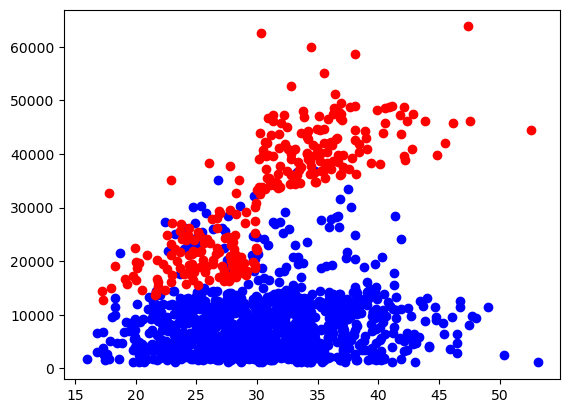

In [85]:
smoker_charges = insurance.loc[insurance['smoker'] == 'yes']
nonsmoker_charges = insurance.loc[insurance['smoker'] == 'no']

plt.scatter(nonsmoker_charges['bmi'], nonsmoker_charges['charges'], color='blue')
plt.scatter(smoker_charges['bmi'], smoker_charges['charges'], color='red')



Conclusion: Having a high BMI does not necessarily raise your health insurance costs unless you are a smoker, then it definitely does. 

Is health insurance priced differently by region?

In [94]:
print(insurance['region'].unique())

sw = insurance.loc[insurance['region'] == 'southwest']
se = insurance.loc[insurance['region'] == 'southeast']
nw = insurance.loc[insurance['region'] == 'northwest']
ne = insurance.loc[insurance['region'] == 'northeast']

print('Average Cost in SW: ' + str(sw['charges'].mean()))
print('Average Cost in SE: ' + str(se['charges'].mean()))
print('Average Cost in NW: ' + str(nw['charges'].mean()))
print('Average Cost in NE: ' + str(ne['charges'].mean()))

['southwest' 'southeast' 'northwest' 'northeast']
Average Cost in SW: 12346.937377292308
Average Cost in SE: 14735.411437609888
Average Cost in NW: 12417.57537396923
Average Cost in NE: 13406.384516385804


Healthcare costs are most expensive in the South East. Is it because there are more smokers in the SE than anywhere else? 

Create a chart showing % smokers by region

In [132]:
sw_smoke = sw.loc[sw['smoker'] == 'yes']          
perc_sw_smoke = (sw_smoke['age'].count() / sw['age'].count()) * 100 

print('% SW Smokers: ' + str(perc_sw_smoke))

se_smoke = se.loc[se['smoker'] == 'yes']
perc_se_smoke = (se_smoke['age'].count() / se['age'].count()) * 100
print('% SE Smokers: ' + str(perc_se_smoke))

nw_smoke = nw.loc[nw['smoker'] == 'yes']
perc_nw_smoke = (nw_smoke['age'].count() / nw['age'].count()) * 100
print('% NW Smokers: ' + str(perc_nw_smoke))

ne_smoke = ne.loc[ne['smoker'] == 'yes']
perc_ne_smoke = (ne_smoke['age'].count() / ne['age'].count()) * 100
print('% NE Smokers: ' + str(perc_ne_smoke))





% SW Smokers: 17.846153846153847
% SE Smokers: 25.0
% NW Smokers: 17.846153846153847
% NE Smokers: 20.679012345679013


Overall Conclusions: 
- if you are a smoker, a higher BMI directly corresponds with a higher healthcare cost
- if you are a non-smoker, a higher BMI does not directly correspond to a higher healthcare cost

- Average healthcare costs by region are directly related to what % of the population in that regions smokes. Example: The SE has the highest healthcare costs, and they also have the highest % of smokers (25%). 